# ARMA Model
This notebook contains experiments with an Autoregressive Moving Average Model which have not been completed. For reference only.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
seasonal_decompose?

In [4]:
from australian_housing import paths

In [5]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0)
decomposed = seasonal_decompose(ts, model='additive', freq=12, two_sided=False)
decomposed_resid = decomposed.resid.loc[~decomposed.resid.isna().Value]

In [6]:
model = ARMA(decomposed_resid, order=(1,1), freq='MS')
model_fit = model.fit()

In [7]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Value   No. Observations:                   61
Model:                     ARMA(1, 1)   Log Likelihood                -392.139
Method:                       css-mle   S.D. of innovations            149.624
Date:                Sat, 08 Dec 2018   AIC                            792.278
Time:                        22:07:21   BIC                            800.721
Sample:                    07-01-2012   HQIC                           795.587
                         - 07-01-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         110.2691     22.860      4.824      0.000      65.464     155.074
ar.L1.Value    -0.4293      0.251     -1.710      0.093      -0.921       0.063
ma.L1.Value     0.7086      0.190      3.724      0.000       0.336       1.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3293           +0.0000j            2.3293            0.5000
MA.1           -1.4112           +0.0000j            1.4112            0.5000
-----------------------------------------------------------------------------
"""

In [8]:
residuals = pd.DataFrame(model_fit.resid)

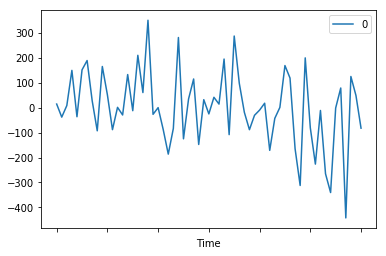

In [9]:
residuals.plot();

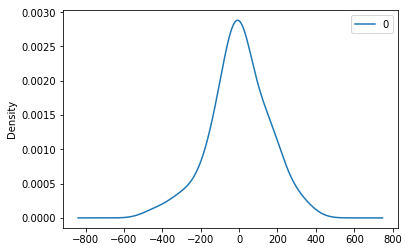

In [10]:
residuals.plot(kind='kde');

In [11]:
residuals.describe()

,0
count,61.000000
mean,0.065357
std,150.889540
min,-442.189000
25%,-83.318905
50%,0.238442
75%,97.938624
max,350.838171


In [12]:
history = decomposed.trend.Value + model_fit.predict(ts.index[12], ts.index[-1])
prediction = decomposed.trend.Value + model_fit.predict(ts.index[-1], '2020-07-01')

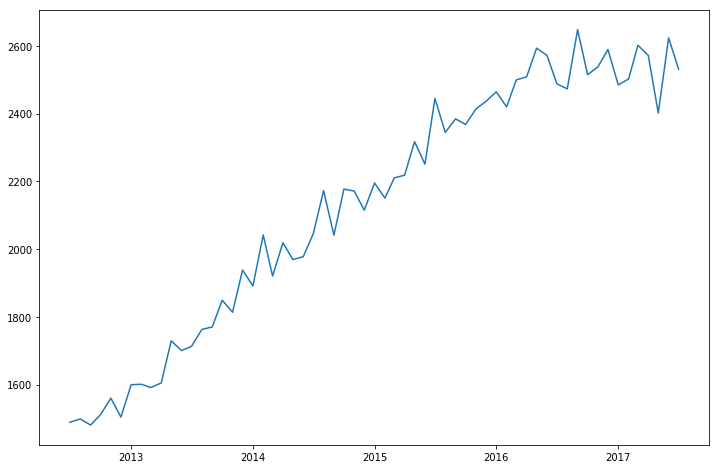

In [13]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.plot(history);
ax.plot(prediction);

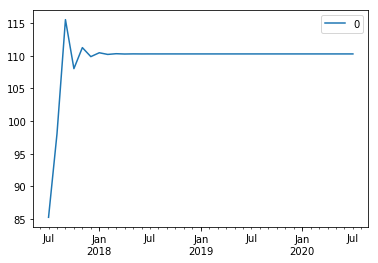

In [14]:
pd.DataFrame(model_fit.predict(ts.index[-1], '2020-07-01')).plot();

In [15]:
decomposed.seasonal

,Value
Time,
2011-07-01,205.201505
2011-08-01,128.086227
2011-09-01,24.569560
2011-10-01,186.527894
2011-11-01,130.019560
2011-12-01,-317.105440
2012-01-01,-551.263773
2012-02-01,-48.238773
2012-03-01,90.244560
